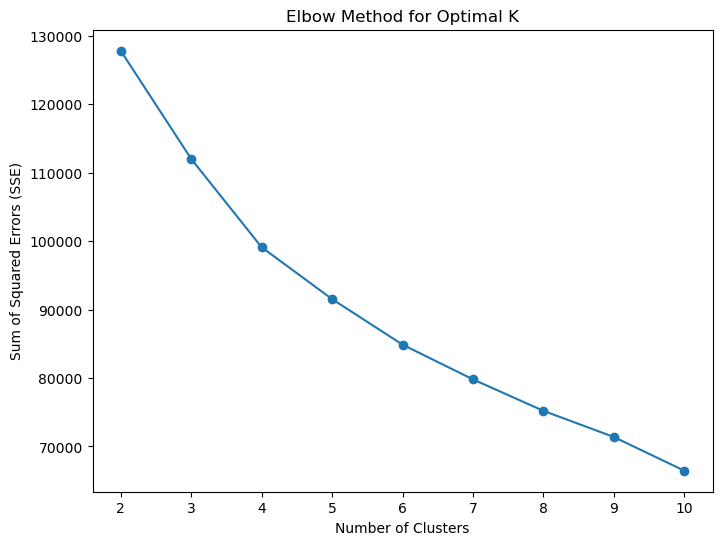

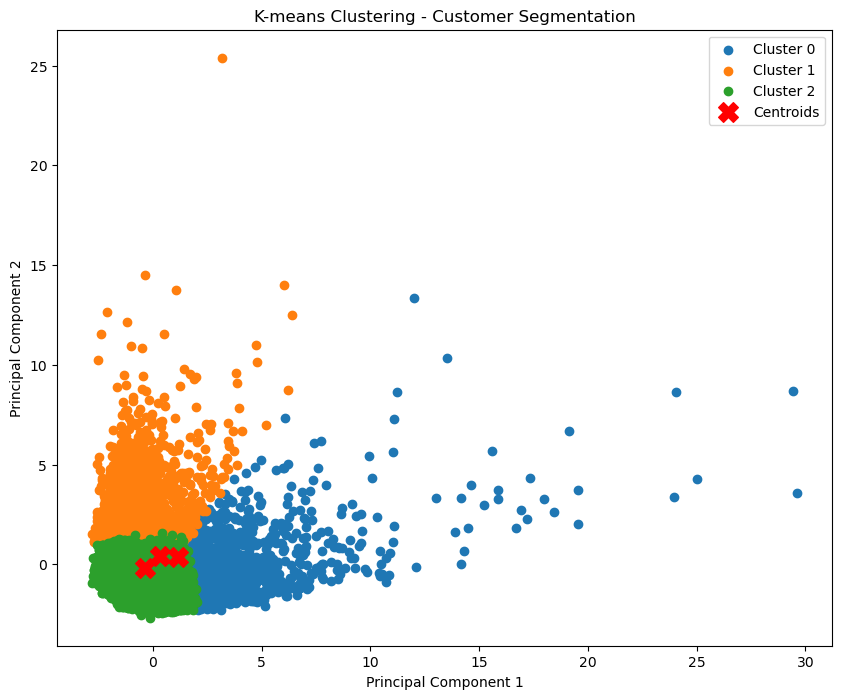

Cluster Characteristics:
         Principal Component 1  Principal Component 2
Cluster                                              
0                     3.885878              -0.148933
1                    -0.768574               2.980211
2                    -0.586225              -0.743292


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings

# Suppress FutureWarning related to KMeans
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load and preprocess the dataset
file_path = "C:/Users/admin/Documents/ADS_Assignments/CC GENERAL.csv"
credit_data = pd.read_csv(file_path)

# Drop unnecessary columns
credit_data.drop(['CUST_ID'], axis=1, inplace=True)

# Handle missing data
credit_data.fillna(method='ffill', inplace=True)

# Feature scaling and normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(credit_data)

# Apply the K-means clustering algorithm
# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose the optimal number of clusters (e.g., from the elbow curve)
optimal_k = 3

# Initialize the KMeans model with the optimal number of clusters
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)  # or n_init='auto'
cluster_labels = kmeans_model.fit_predict(scaled_data)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
clustered_data = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
clustered_data['Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_data = clustered_data[clustered_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Principal Component 1'], cluster_data['Principal Component 2'], label=f'Cluster {cluster}')

plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering - Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Analyze the characteristics of each cluster
clustered_data['Cluster'] = cluster_labels
cluster_characteristics = clustered_data.groupby('Cluster').mean()
print("Cluster Characteristics:")
print(cluster_characteristics)